In [34]:
#import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [35]:
#import dataset
df = pd.read_csv("breast.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [36]:
df.shape 

(569, 6)

In [37]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [38]:
df.describe() #базовая статистика о данных

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [39]:
#проверка любых нулевых значений в наборе данных
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [40]:
count = df.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

Есть 357 одного класса(1) и 212 другого класса(0) 

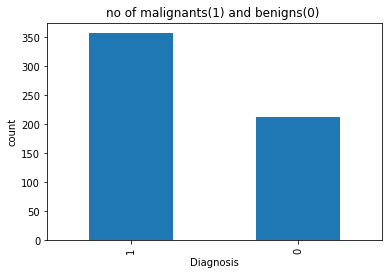

In [41]:
count.plot(kind='bar')
plt.title("no of malignants(1) and benigns(0) ")
plt.xlabel("Diagnosis")
plt.ylabel("count");

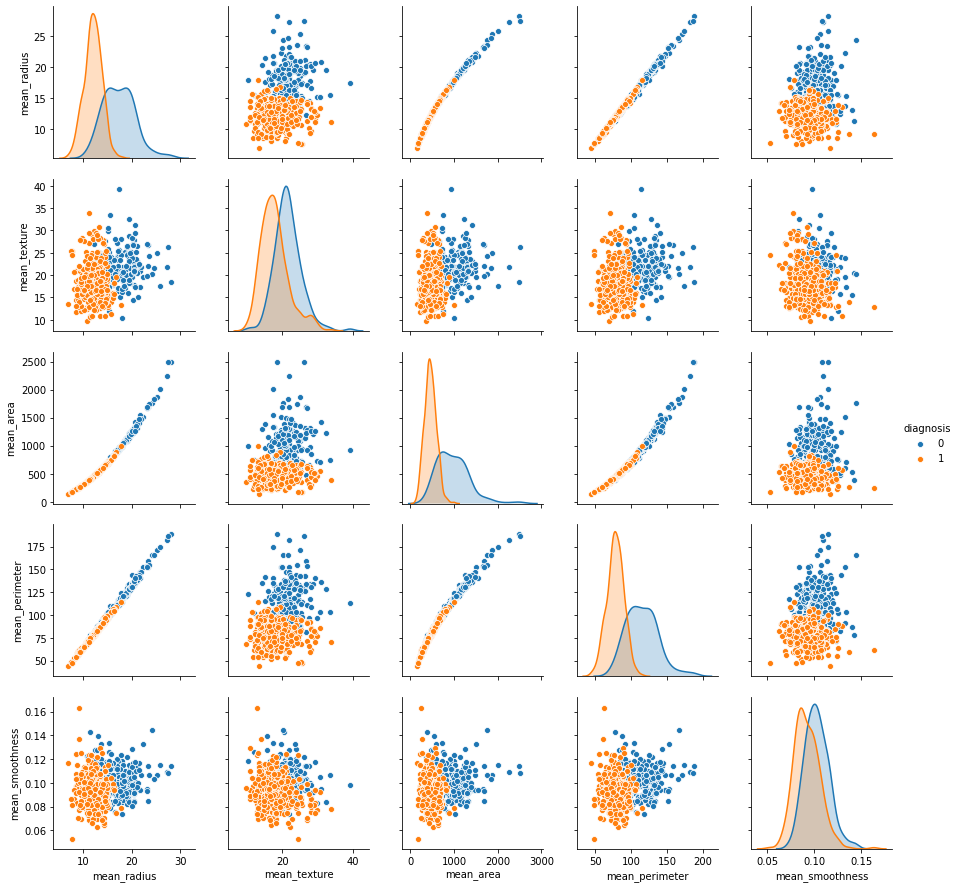

In [42]:
sns.pairplot(df, hue = 'diagnosis', vars = ['mean_radius', 'mean_texture', 'mean_area', 'mean_perimeter', 'mean_smoothness'] );

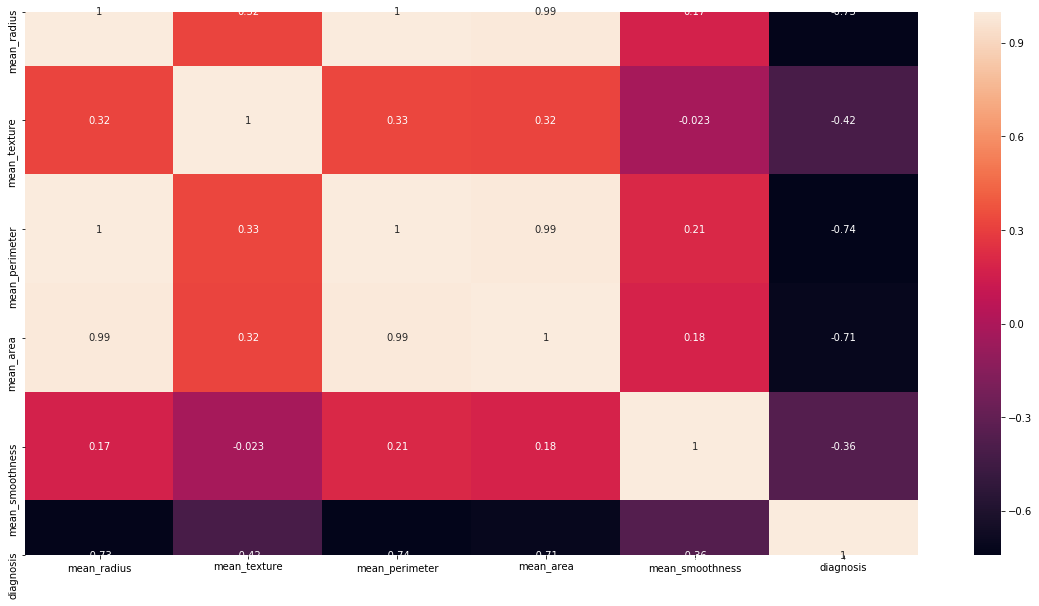

In [43]:
#Проверим соотношение между переменными(коэффициент корреляции)
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) ;

Наблюдаем на тепловой карте корреляции,что есть сильная отрицательная корреляция между diagnosis and mean_perimeter,mean_radius and mean_area.

In [44]:
X = df.drop(['diagnosis'],axis=1)
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [45]:
y = df['diagnosis']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

# Разделим набор данных

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [47]:
X_train.shape

(455, 5)

In [48]:
X_test.shape

(114, 5)

In [49]:
y_train.shape

(455,)

In [50]:
y_test.shape

(114,)

Теперь есть данные, разделенные на обучающие(80%) и тестовые(20%).

# Training the Model

In [51]:
#используем модель логистической регрессии, чтобы классифицировать, является ли опухоль злокачественной или доброкачественной, основываясь на характеристиках или особенностях.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
classifier = LogisticRegression()

In [53]:
classifier.fit(X_train, y_train)

/Users/caesar_julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Прогнозирование результатов тестового набора

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1])

Расчет точности модели

In [77]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy оценки с использованием логистической регрессии:", acc*100)

Accuracy оценки с использованием логистической регрессии: 91.59663865546219


In [69]:
#Нарисуем тепловую карту с подписями для матрицы корреляций
cm = confusion_matrix(y_test, y_pred)

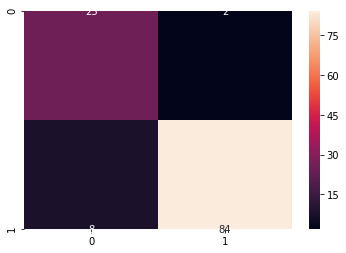

In [70]:
sns.heatmap(cm, annot=True);

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83        27
           1       0.98      0.91      0.94        92

    accuracy                           0.92       119
   macro avg       0.87      0.92      0.89       119
weighted avg       0.93      0.92      0.92       119



Имееи точность 91%

In [72]:
pd.isnull(df).sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [73]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [74]:
X_train = df[:450].drop(df.columns[[-1]], axis=1).to_numpy()
X_test = df[450:].drop(df.columns[[-1]], axis=1).to_numpy()
y_train = df[:450]['diagnosis'].to_numpy()
y_test = df[450:]['diagnosis'].to_numpy()

In [75]:
X_train

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01],
       ...,
       [1.480e+01, 1.766e+01, 9.588e+01, 6.748e+02, 9.179e-02],
       [1.453e+01, 1.934e+01, 9.425e+01, 6.597e+02, 8.388e-02],
       [2.110e+01, 2.052e+01, 1.381e+02, 1.384e+03, 9.684e-02]])

In [76]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,